### [Statistics vs Machine Learning](https://towardsdatascience.com/the-actual-difference-between-statistics-and-machine-learning-64b49f07ea3)

**The major difference between machine learning and statistics is their purpose.**

**Machine learning models are designed to make the most accurate predictions possible.**

**Statistical models are designed for inference about the relationships between variables.**

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


skincancer = pd.read_csv('/Users/edward/Documents/TIL/Stats_LinearAlgebra/Regression/regression_data/skincancer.txt', sep='\t')
skincancer.head(3)

,State,Lat,Mort,Ocean,Long
0,Alabama,33.0,219,1,87.0
1,Arizona,34.5,160,0,112.0
2,Arkansas,35.0,170,0,92.5


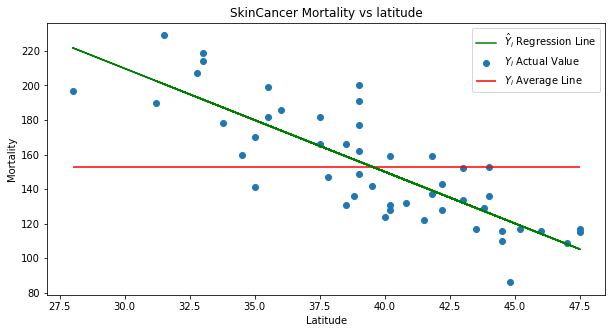

In [15]:
import statsmodels.api as sm

X = skincancer['Lat']
y = skincancer['Mort']

feature_add = sm.add_constant(X, has_constant='add')

# # sm OLS 적합
model = sm.OLS(y, feature_add)
fitted_model = model.fit()
target_pred = fitted_model.predict()


plt.figure(figsize=(10,5))
plt.scatter(X,y, label='$Y_i$ Actual Value')
plt.plot(X, target_pred, color = 'g', label='$\hat{Y}_i$ Regression Line')
plt.hlines(y.mean(), X.min(), X.max(), color = 'r', label='$Y_i$ Average Line')

plt.xlabel('Latitude', fontsize=10)
plt.ylabel('Mortality', fontsize=10)
plt.title('SkinCancer Mortality vs latitude')
plt.legend()
plt.show()

In [18]:
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Mort   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     99.80
Date:                Fri, 10 Feb 2023   Prob (F-statistic):           3.31e-13
Time:                        00:50:09   Log-Likelihood:                -213.08
No. Observations:                  49   AIC:                             430.2
Df Residuals:                      47   BIC:                             433.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        389.1894     23.812     16.344      0.000     341.285     437.094
Lat           -5.9776      0.598     -9.990      0.000      -7.181      -4.774
==============================================================================
Omnibus:                        0.740   Durbin-Watson:                   2.131
Prob(Omnibus):                  0.691   Jarque-Bera (JB):                0.773
Skew:                           0.094   Prob(JB):                        0.679
Kurtosis:                       2.414   Cond. No.                         347.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""